In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from scipy.stats import pearsonr
import warnings

In [2]:
data=pd.read_csv('LOG_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
datos = data
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOG_AR_U_(1)         68 non-null     float64
 1   LOG_AR_U_(2)         68 non-null     float64
 2   LOG_AR_U_(3)         68 non-null     float64
 3   LOG_AR_U_(4)         68 non-null     float64
 4   LOG_mu(U)            68 non-null     float64
 5   LOG_loglik_U         68 non-null     float64
 6   LOG_Logpost_U        68 non-null     float64
 7   log_MA_U             68 non-null     float64
 8   log_measerr_scale_U  68 non-null     float64
 9   LOG_SIGMA_U          68 non-null     float64
 10  LOG_var_U            68 non-null     float64
 11  LOG_L_UV             68 non-null     float64
 12  L_5100               68 non-null     float64
 13  L_3000               68 non-null     float64
 14  L_H_beta             68 non-null     float64
 15  MG_II                68 non-null     float

In [3]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix


,LOG_AR_U_(1),LOG_AR_U_(2),LOG_AR_U_(3),LOG_AR_U_(4),LOG_mu(U),LOG_loglik_U,LOG_Logpost_U,log_MA_U,log_measerr_scale_U,LOG_SIGMA_U,LOG_var_U,LOG_L_UV,L_5100,L_3000,L_H_beta,MG_II,0II_5007,OIII_4959
LOG_AR_U_(1),1.000000,0.328737,0.376416,0.468285,-0.110091,0.367609,0.070273,0.150830,0.047757,0.214380,-0.003434,0.051124,0.037134,-0.001926,-0.221898,0.143694,0.046180,-0.005906
LOG_AR_U_(2),0.328737,1.000000,0.576522,0.390164,-0.037960,-0.009119,0.010981,0.173885,0.029577,0.189259,-0.009404,-0.283134,0.018802,0.023650,-0.066338,0.060256,-0.196086,-0.055812
LOG_AR_U_(3),0.376416,0.576522,1.000000,0.417804,-0.198283,-0.038556,0.146107,0.010855,-0.054175,0.360175,-0.069802,-0.120164,-0.000848,-0.014354,-0.057289,0.096653,-0.220471,0.058477
LOG_AR_U_(4),0.468285,0.390164,0.417804,1.000000,-0.102019,0.054407,0.035078,0.155029,0.001338,0.235514,-0.059017,0.116885,-0.103991,0.105477,0.010545,0.116877,0.062267,0.026323
LOG_mu(U),-0.110091,-0.037960,-0.198283,-0.102019,1.000000,-0.187984,-0.774487,0.045063,-0.165085,0.068142,0.256598,0.279585,-0.011005,-0.009722,0.183900,-0.000328,-0.058257,-0.009834
LOG_loglik_U,0.367609,-0.009119,-0.038556,0.054407,-0.187984,1.000000,0.093722,-0.032557,0.030177,-0.039889,-0.175412,0.163964,-0.150184,0.232978,-0.096676,0.181207,-0.004215,-0.097637
LOG_Logpost_U,0.070273,0.010981,0.146107,0.035078,-0.774487,0.093722,1.000000,0.000691,0.124355,-0.220909,-0.274865,-0.235409,0.003883,0.017489,-0.080973,-0.025795,-0.019940,-0.033998
log_MA_U,0.150830,0.173885,0.010855,0.155029,0.045063,-0.032557,0.000691,1.000000,-0.146643,0.066226,0.138985,0.161857,0.163493,-0.284550,0.107871,-0.066536,0.140723,-0.131068
log_measerr_scale_U,0.047757,0.029577,-0.054175,0.001338,-0.165085,0.030177,0.124355,-0.146643,1.000000,-0.279198,-0.270773,-0.088787,-0.026577,-0.193263,-0.049704,0.030988,0.021413,0.032680
LOG_SIGMA_U,0.214380,0.189259,0.360175,0.235514,0.068142,-0.039889,-0.220909,0.066226,-0.279198,1.000000,0.185497,0.129709,0.006192,-0.102630,-0.006360,-0.038377,-0.245287,0.087769


In [4]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
78,LOG_mu(U),LOG_Logpost_U,-0.774487,0.774487
112,LOG_Logpost_U,LOG_mu(U),-0.774487,0.774487
20,LOG_AR_U_(2),LOG_AR_U_(3),0.576522,0.576522
37,LOG_AR_U_(3),LOG_AR_U_(2),0.576522,0.576522
54,LOG_AR_U_(4),LOG_AR_U_(1),0.468285,0.468285
3,LOG_AR_U_(1),LOG_AR_U_(4),0.468285,0.468285
56,LOG_AR_U_(4),LOG_AR_U_(3),0.417804,0.417804
39,LOG_AR_U_(3),LOG_AR_U_(4),0.417804,0.417804
55,LOG_AR_U_(4),LOG_AR_U_(2),0.390164,0.390164
21,LOG_AR_U_(2),LOG_AR_U_(4),0.390164,0.390164


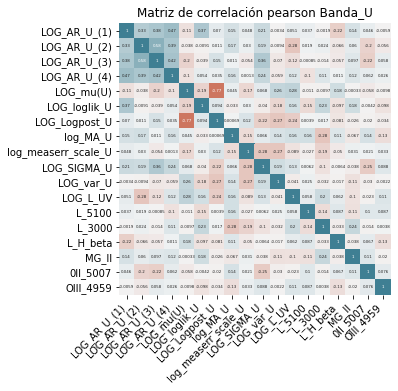

In [5]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 4},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title("Matriz de correlación pearson Banda_U")
plt.savefig("Matriz_Banda_U_pearson.pdf")

In [6]:
data=pd.read_csv('LOG_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
datos = data
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOG_AR_G_(1)         68 non-null     float64
 1   LOG_AR_G_(2)         68 non-null     float64
 2   LOG_AR_G_(3)         68 non-null     float64
 3   LOG_AR_G_(4)         68 non-null     float64
 4   Log_MU_G             68 non-null     float64
 5   LOG_loglik_G         68 non-null     float64
 6   LOG_logpost_G        68 non-null     float64
 7   LOG_MA_G             68 non-null     float64
 8   LOG_measerr_scale_G  68 non-null     float64
 9   LOG_sigma_G          68 non-null     float64
 10  LOG_VAR_G            68 non-null     float64
 11  LOG_L_UV             68 non-null     float64
 12  L_5100               68 non-null     float64
 13  L_3000               68 non-null     float64
 14  L_H_beta             68 non-null     float64
 15  MG_II                68 non-null     float

In [7]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix


,LOG_AR_G_(1),LOG_AR_G_(2),LOG_AR_G_(3),LOG_AR_G_(4),Log_MU_G,LOG_loglik_G,LOG_logpost_G,LOG_MA_G,LOG_measerr_scale_G,LOG_sigma_G,LOG_VAR_G,LOG_L_UV,L_5100,L_3000,L_H_beta,MG_II,0II_5007,OIII_4959
LOG_AR_G_(1),1.000000,0.310919,-0.162552,0.050932,0.075845,0.009092,-0.116717,-0.044239,-0.074178,-0.026469,-0.017977,-0.011092,0.096277,-0.116595,0.013932,0.051010,-0.220715,0.061181
LOG_AR_G_(2),0.310919,1.000000,0.456393,0.203330,-0.025215,-0.128205,0.040082,-0.180764,-0.073483,0.118290,0.022618,-0.037655,0.068301,0.066521,0.059096,0.117974,-0.132468,0.289356
LOG_AR_G_(3),-0.162552,0.456393,1.000000,0.066782,-0.320116,0.010038,-0.056628,-0.213267,-0.163722,0.175891,-0.221749,-0.068752,0.066409,0.060718,0.094408,-0.039117,0.057210,0.114082
LOG_AR_G_(4),0.050932,0.203330,0.066782,1.000000,-0.030933,0.166730,-0.055215,-0.212087,-0.082691,0.104450,-0.041604,-0.156138,0.209617,-0.176238,-0.142319,0.002231,-0.063027,0.217622
Log_MU_G,0.075845,-0.025215,-0.320116,-0.030933,1.000000,-0.388374,-0.093182,0.011694,0.062250,0.171090,0.251364,-0.137659,-0.202073,-0.196304,-0.135177,0.151437,-0.052542,-0.093260
LOG_loglik_G,0.009092,-0.128205,0.010038,0.166730,-0.388374,1.000000,0.083770,-0.301184,0.136605,-0.113069,-0.406617,-0.093881,0.144484,-0.048773,-0.055130,-0.113974,-0.014500,0.095893
LOG_logpost_G,-0.116717,0.040082,-0.056628,-0.055215,-0.093182,0.083770,1.000000,0.016386,0.046979,-0.023675,-0.095554,-0.054494,0.083774,0.223372,-0.111664,0.007712,0.112037,-0.002609
LOG_MA_G,-0.044239,-0.180764,-0.213267,-0.212087,0.011694,-0.301184,0.016386,1.000000,0.028974,-0.097440,0.018437,0.186284,-0.037462,0.079921,-0.193873,0.063876,0.299029,-0.230902
LOG_measerr_scale_G,-0.074178,-0.073483,-0.163722,-0.082691,0.062250,0.136605,0.046979,0.028974,1.000000,-0.070440,0.049934,0.129384,0.120401,-0.052551,-0.134131,0.101886,0.139012,0.103044
LOG_sigma_G,-0.026469,0.118290,0.175891,0.104450,0.171090,-0.113069,-0.023675,-0.097440,-0.070440,1.000000,-0.048235,-0.030226,-0.105316,-0.313735,0.197923,-0.125957,0.004468,-0.107209


In [8]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
20,LOG_AR_G_(2),LOG_AR_G_(3),0.456393,0.456393
37,LOG_AR_G_(3),LOG_AR_G_(2),0.456393,0.456393
100,LOG_loglik_G,LOG_VAR_G,-0.406617,0.406617
185,LOG_VAR_G,LOG_loglik_G,-0.406617,0.406617
94,LOG_loglik_G,Log_MU_G,-0.388374,0.388374
77,Log_MU_G,LOG_loglik_G,-0.388374,0.388374
74,Log_MU_G,LOG_AR_G_(3),-0.320116,0.320116
40,LOG_AR_G_(3),Log_MU_G,-0.320116,0.320116
243,L_3000,LOG_sigma_G,-0.313735,0.313735
175,LOG_sigma_G,L_3000,-0.313735,0.313735


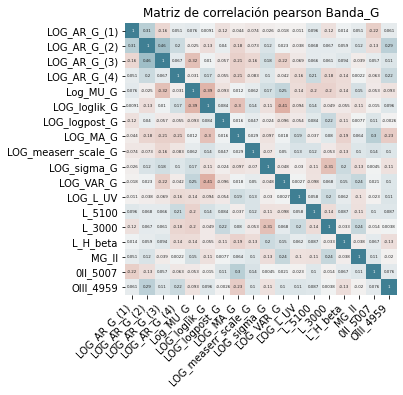

In [9]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 4},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title("Matriz de correlación pearson Banda_G")
plt.savefig("Matriz_Banda_G_pearson.pdf")

In [19]:
data=pd.read_csv('LOG_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
datos = data
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOG_AR_R_(1)         68 non-null     float64
 1   LOG_AR_R_(2)         68 non-null     float64
 2   LOG_AR_R_(3)         68 non-null     float64
 3   LOG_AR_R_(4)         68 non-null     float64
 4   LOG_mu_R             68 non-null     float64
 5   LOG_loglik_R         68 non-null     float64
 6   LOG_logpost_R        68 non-null     float64
 7   LOG_MA_R             68 non-null     float64
 8   LOG_Measerr_scale_R  68 non-null     float64
 9   LOG_sigma_R          68 non-null     float64
 10  LOG_VAR_R            68 non-null     float64
 11  LOG_LUV              68 non-null     float64
 12  L_5100               68 non-null     float64
 13  L_3000               68 non-null     float64
 14  L_H_beta             68 non-null     float64
 15  MG_II                68 non-null     float

In [20]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix


,LOG_AR_R_(1),LOG_AR_R_(2),LOG_AR_R_(3),LOG_AR_R_(4),LOG_mu_R,LOG_loglik_R,LOG_logpost_R,LOG_MA_R,LOG_Measerr_scale_R,LOG_sigma_R,LOG_VAR_R,LOG_LUV,L_5100,L_3000,L_H_beta,MG_II,0II_5007,OIII_4959
LOG_AR_R_(1),1.000000,0.728865,0.758774,0.082922,-0.240438,0.490274,0.493893,-0.037179,0.110485,0.477635,-0.017065,-0.040982,-0.146711,-0.183992,0.126413,0.024199,-0.096409,0.146863
LOG_AR_R_(2),0.728865,1.000000,0.917585,0.079633,-0.335328,0.285182,0.287666,-0.038488,-0.114388,0.625950,-0.083834,-0.115733,-0.124310,-0.241717,0.092954,-0.048589,-0.129680,0.215761
LOG_AR_R_(3),0.758774,0.917585,1.000000,0.136487,-0.388029,0.277647,0.283901,0.020227,-0.115648,0.631926,-0.135607,-0.210644,-0.107209,-0.286398,0.098914,-0.082042,-0.091556,0.111654
LOG_AR_R_(4),0.082922,0.079633,0.136487,1.000000,0.052472,0.008782,0.016099,-0.065562,0.057988,0.043278,-0.029082,0.197326,-0.119648,0.053281,-0.057603,-0.129275,-0.068550,-0.050335
LOG_mu_R,-0.240438,-0.335328,-0.388029,0.052472,1.000000,-0.484671,-0.495566,0.052122,0.447218,-0.304713,0.096354,0.116524,-0.161216,0.077951,-0.019554,-0.136566,-0.088026,-0.313587
LOG_loglik_R,0.490274,0.285182,0.277647,0.008782,-0.484671,1.000000,0.999042,-0.261903,-0.107256,0.203324,-0.127985,0.090878,-0.021551,-0.048078,-0.048473,0.205758,-0.041095,0.270696
LOG_logpost_R,0.493893,0.287666,0.283901,0.016099,-0.495566,0.999042,1.000000,-0.255184,-0.107859,0.207526,-0.133341,0.089337,-0.018964,-0.054777,-0.052750,0.201553,-0.034679,0.277057
LOG_MA_R,-0.037179,-0.038488,0.020227,-0.065562,0.052122,-0.261903,-0.255184,1.000000,-0.107523,-0.262174,-0.082412,-0.100428,-0.161429,0.004065,-0.144687,0.147118,0.142625,-0.112241
LOG_Measerr_scale_R,0.110485,-0.114388,-0.115648,0.057988,0.447218,-0.107256,-0.107859,-0.107523,1.000000,-0.040651,-0.020442,0.070709,-0.110158,0.003693,0.073584,-0.155222,-0.091824,-0.145622
LOG_sigma_R,0.477635,0.625950,0.631926,0.043278,-0.304713,0.203324,0.207526,-0.262174,-0.040651,1.000000,0.071485,0.007030,-0.025686,-0.191769,0.202128,-0.052092,-0.194697,0.290000


In [21]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
96,LOG_loglik_R,LOG_logpost_R,0.999042,0.999042
113,LOG_logpost_R,LOG_loglik_R,0.999042,0.999042
20,LOG_AR_R_(2),LOG_AR_R_(3),0.917585,0.917585
37,LOG_AR_R_(3),LOG_AR_R_(2),0.917585,0.917585
2,LOG_AR_R_(1),LOG_AR_R_(3),0.758774,0.758774
36,LOG_AR_R_(3),LOG_AR_R_(1),0.758774,0.758774
18,LOG_AR_R_(2),LOG_AR_R_(1),0.728865,0.728865
1,LOG_AR_R_(1),LOG_AR_R_(2),0.728865,0.728865
45,LOG_AR_R_(3),LOG_sigma_R,0.631926,0.631926
164,LOG_sigma_R,LOG_AR_R_(3),0.631926,0.631926


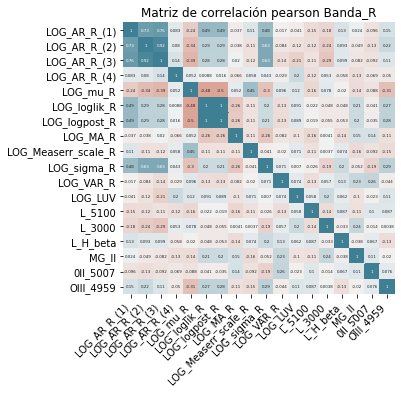

In [22]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 4},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title("Matriz de correlación pearson Banda_R")
plt.savefig("Matriz_Banda_R_pearson.pdf")

In [25]:
data=pd.read_csv('LOG_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
datos = data
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOG_AR_I_(1)         68 non-null     float64
 1   LOG_AR_I_(2)         68 non-null     float64
 2   LOG_AR_I_(3)         68 non-null     float64
 3   LOG_AR_I_(4)         68 non-null     float64
 4   LOG_mu_(I)           68 non-null     float64
 5   LOG_loglik_I         68 non-null     float64
 6   LOG_logpost_I        68 non-null     float64
 7   LOG_MA_I             68 non-null     float64
 8   LOG_measerr_scale_I  68 non-null     float64
 9   LOG_sigma_I          68 non-null     float64
 10  LOG_VAR_I            68 non-null     float64
 11  LOG_L_UV             68 non-null     float64
 12  L_5100               68 non-null     float64
 13  L_3000               68 non-null     float64
 14  L_H_beta             68 non-null     float64
 15  MG_II                68 non-null     float

In [26]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix

,LOG_AR_I_(1),LOG_AR_I_(2),LOG_AR_I_(3),LOG_AR_I_(4),LOG_mu_(I),LOG_loglik_I,LOG_logpost_I,LOG_MA_I,LOG_measerr_scale_I,LOG_sigma_I,LOG_VAR_I,LOG_L_UV,L_5100,L_3000,L_H_beta,MG_II,0II_5007,OIII_4959
LOG_AR_I_(1),1.000000,0.567172,0.657474,0.188846,-0.445748,0.422928,0.423561,-0.482012,-0.068276,0.590334,-0.035515,-0.123158,0.015278,-0.060129,-0.005316,0.116721,-0.039789,0.157041
LOG_AR_I_(2),0.567172,1.000000,0.899170,0.334287,-0.458768,0.189755,0.190214,0.004739,-0.043202,-0.019298,-0.301650,-0.295090,0.046076,-0.088790,-0.176831,0.118426,0.114383,0.115141
LOG_AR_I_(3),0.657474,0.899170,1.000000,0.329618,-0.533952,0.199039,0.199929,0.005966,-0.107260,0.112382,-0.334887,-0.391467,-0.027134,-0.075713,-0.110101,0.137417,0.075476,0.069999
LOG_AR_I_(4),0.188846,0.334287,0.329618,1.000000,-0.243008,-0.044008,-0.044036,-0.109182,0.032074,0.074430,-0.002377,-0.240858,0.030022,0.047571,-0.067145,0.074055,0.021660,0.205465
LOG_mu_(I),-0.445748,-0.458768,-0.533952,-0.243008,1.000000,-0.543022,-0.544038,0.115619,0.146801,-0.126798,0.192805,0.150503,-0.149110,0.096972,-0.018701,-0.117785,-0.093541,-0.287598
LOG_loglik_I,0.422928,0.189755,0.199039,-0.044008,-0.543022,1.000000,0.999988,-0.125184,-0.119632,0.051962,-0.261210,0.110888,-0.029201,-0.081292,0.031779,0.130240,-0.005936,0.312522
LOG_logpost_I,0.423561,0.190214,0.199929,-0.044036,-0.544038,0.999988,1.000000,-0.125013,-0.119604,0.052277,-0.261629,0.110858,-0.028835,-0.081481,0.031390,0.129827,-0.006252,0.312559
LOG_MA_I,-0.482012,0.004739,0.005966,-0.109182,0.115619,-0.125184,-0.125013,1.000000,-0.065468,-0.654789,-0.252136,-0.049085,-0.112227,0.052445,-0.209027,-0.031961,0.126446,-0.160249
LOG_measerr_scale_I,-0.068276,-0.043202,-0.107260,0.032074,0.146801,-0.119632,-0.119604,-0.065468,1.000000,0.032249,0.092190,0.008076,0.029400,-0.178025,-0.145062,0.028636,-0.172386,0.077087
LOG_sigma_I,0.590334,-0.019298,0.112382,0.074430,-0.126798,0.051962,0.052277,-0.654789,0.032249,1.000000,0.192165,0.053246,0.031922,0.012427,0.148663,-0.025374,-0.055553,-0.005987


In [27]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
113,LOG_logpost_I,LOG_loglik_I,0.999988,0.999988
96,LOG_loglik_I,LOG_logpost_I,0.999988,0.999988
37,LOG_AR_I_(3),LOG_AR_I_(2),0.899170,0.899170
20,LOG_AR_I_(2),LOG_AR_I_(3),0.899170,0.899170
2,LOG_AR_I_(1),LOG_AR_I_(3),0.657474,0.657474
36,LOG_AR_I_(3),LOG_AR_I_(1),0.657474,0.657474
169,LOG_sigma_I,LOG_MA_I,-0.654789,0.654789
135,LOG_MA_I,LOG_sigma_I,-0.654789,0.654789
162,LOG_sigma_I,LOG_AR_I_(1),0.590334,0.590334
9,LOG_AR_I_(1),LOG_sigma_I,0.590334,0.590334


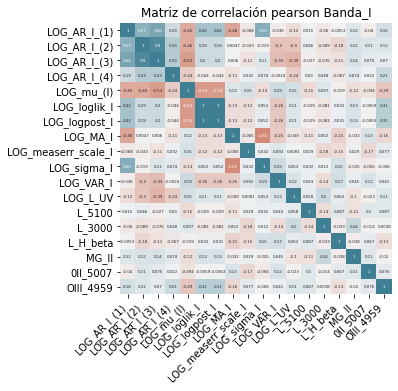

In [28]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 4},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title("Matriz de correlación pearson Banda_I")
plt.savefig("Matriz_Banda_I_pearson.pdf")

In [29]:
data=pd.read_csv('LOG_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
datos = data
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LOG_AR_Z_(1)         68 non-null     float64
 1   LOG_AR_Z_(2)         68 non-null     float64
 2   LOG_AR_Z_(3)         68 non-null     float64
 3   LOG_AR_Z_(4)         68 non-null     float64
 4   LOG_mu_(Z)           68 non-null     float64
 5   LOG_loglik_Z         68 non-null     float64
 6   LOG_logpost_Z        68 non-null     float64
 7   LOG_MA_Z             68 non-null     float64
 8   LOG_measerr_scale_Z  68 non-null     float64
 9   LOG_sigma_Z          68 non-null     float64
 10  LOG_VAR_Z            68 non-null     float64
 11  LOG_L_UV             68 non-null     float64
 12  L_5100               68 non-null     float64
 13  L_3000               68 non-null     float64
 14  L_H_beta             68 non-null     float64
 15  MG_II                68 non-null     float

In [30]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix

,LOG_AR_Z_(1),LOG_AR_Z_(2),LOG_AR_Z_(3),LOG_AR_Z_(4),LOG_mu_(Z),LOG_loglik_Z,LOG_logpost_Z,LOG_MA_Z,LOG_measerr_scale_Z,LOG_sigma_Z,LOG_VAR_Z,LOG_L_UV,L_5100,L_3000,L_H_beta,MG_II,0II_5007,OIII_4959
LOG_AR_Z_(1),1.000000,0.742150,0.758113,0.578957,-0.264294,0.326504,0.326504,-0.003484,-0.232104,0.055222,-0.053343,0.077931,0.002419,-0.044672,0.227396,-0.053446,0.088105,0.016178
LOG_AR_Z_(2),0.742150,1.000000,0.946627,0.905943,-0.270923,0.296059,0.296059,-0.033086,-0.061162,-0.015913,-0.193352,0.081147,0.024121,-0.111674,0.043059,-0.085589,0.056582,0.111305
LOG_AR_Z_(3),0.758113,0.946627,1.000000,0.950194,-0.289296,0.241997,0.241997,0.035018,-0.028758,-0.009371,-0.142657,0.113811,0.065468,-0.131179,0.144648,-0.120191,0.014528,0.025979
LOG_AR_Z_(4),0.578957,0.905943,0.950194,1.000000,-0.172193,0.106200,0.106200,0.012534,0.024266,-0.017918,-0.176580,0.137896,0.028702,-0.118349,0.049449,-0.132308,0.024377,-0.001551
LOG_mu_(Z),-0.264294,-0.270923,-0.289296,-0.172193,1.000000,-0.599658,-0.599658,0.127725,0.240350,-0.135343,0.047029,0.067073,-0.199732,-0.047974,-0.177740,0.111534,0.034169,-0.071215
LOG_loglik_Z,0.326504,0.296059,0.241997,0.106200,-0.599658,1.000000,1.000000,-0.051809,-0.140871,0.092443,-0.151650,-0.120900,0.123855,-0.055916,0.008849,-0.029861,-0.058795,0.109721
LOG_logpost_Z,0.326504,0.296059,0.241997,0.106200,-0.599658,1.000000,1.000000,-0.051809,-0.140871,0.092443,-0.151650,-0.120900,0.123855,-0.055916,0.008849,-0.029861,-0.058795,0.109721
LOG_MA_Z,-0.003484,-0.033086,0.035018,0.012534,0.127725,-0.051809,-0.051809,1.000000,0.029861,-0.474742,0.107678,0.064955,-0.001338,-0.046940,0.050191,-0.115794,-0.079490,-0.304537
LOG_measerr_scale_Z,-0.232104,-0.061162,-0.028758,0.024266,0.240350,-0.140871,-0.140871,0.029861,1.000000,-0.025511,-0.147507,-0.002829,0.077028,-0.263584,-0.048934,0.173561,-0.062647,-0.106541
LOG_sigma_Z,0.055222,-0.015913,-0.009371,-0.017918,-0.135343,0.092443,0.092443,-0.474742,-0.025511,1.000000,0.113394,0.110034,0.107568,0.037485,-0.013896,-0.037073,-0.196830,0.387017


In [31]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
96,LOG_loglik_Z,LOG_logpost_Z,1.000000,1.000000
113,LOG_logpost_Z,LOG_loglik_Z,1.000000,1.000000
56,LOG_AR_Z_(4),LOG_AR_Z_(3),0.950194,0.950194
39,LOG_AR_Z_(3),LOG_AR_Z_(4),0.950194,0.950194
37,LOG_AR_Z_(3),LOG_AR_Z_(2),0.946627,0.946627
20,LOG_AR_Z_(2),LOG_AR_Z_(3),0.946627,0.946627
55,LOG_AR_Z_(4),LOG_AR_Z_(2),0.905943,0.905943
21,LOG_AR_Z_(2),LOG_AR_Z_(4),0.905943,0.905943
36,LOG_AR_Z_(3),LOG_AR_Z_(1),0.758113,0.758113
2,LOG_AR_Z_(1),LOG_AR_Z_(3),0.758113,0.758113


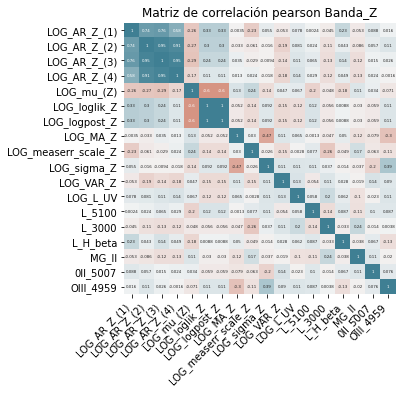

In [32]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 4},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)
plt.title("Matriz de correlación pearson Banda_Z")
plt.savefig("Matriz_Banda_Z_pearson.pdf")